In [15]:
#import library
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import plotnine

In [16]:
#read dataset
table = pd.read_csv("https://academy.dqlab.id/dataset/penduduk_gender_head.csv")
print("Data Sebelum : ")
table.head()

Data Sebelum : 


TAHUN         NAMA PROVINSI NAMA KABUPATEN/KOTA NAMA KECAMATAN  \
0   2013  PROVINSI DKI JAKARTA       JAKARTA PUSAT         GAMBIR   
1   2013  PROVINSI DKI JAKARTA       JAKARTA PUSAT         GAMBIR   
2   2013  PROVINSI DKI JAKARTA       JAKARTA PUSAT         GAMBIR   
3   2013  PROVINSI DKI JAKARTA       JAKARTA PUSAT         GAMBIR   
4   2013  PROVINSI DKI JAKARTA       JAKARTA PUSAT         GAMBIR   

   NAMA KELURAHAN  LAKI-LAKI WNI  PEREMPUAN WNI  LAKI-LAKI WNA  PEREMPUAN WNA  \
0          GAMBIR           1790           1690            1.0            2.0   
1          CIDENG           9159           9206            5.0            6.0   
2    PETOJO UTARA          10811          10436           10.0            8.0   
3  PETOJO SELATAN           8455           8023            5.0            7.0   
4    KEBON KELAPA           6300           6078            6.0           10.0   

   Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  \
0         NaN          NaN          NaN          NaN          NaN   
1         NaN          NaN          NaN          NaN          NaN   
2         NaN          NaN          NaN          NaN          NaN   
3         NaN          NaN          NaN          NaN          NaN   
4         NaN          NaN          NaN          NaN          NaN   

   Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN

In [17]:
# drop kolom yang tidak dibutuhkan
table.drop(columns=['TAHUN','NAMA PROVINSI','NAMA KABUPATEN/KOTA',
                    'LAKI-LAKI WNA','PEREMPUAN WNA',
                    'Unnamed: 9','Unnamed: 10','Unnamed: 11',
                    'Unnamed: 12','Unnamed: 13','Unnamed: 14',
                    'Unnamed: 15','Unnamed: 16','Unnamed: 17'],
                    axis=1, inplace=True)
table.head()

NAMA KECAMATAN  NAMA KELURAHAN  LAKI-LAKI WNI  PEREMPUAN WNI
0         GAMBIR          GAMBIR           1790           1690
1         GAMBIR          CIDENG           9159           9206
2         GAMBIR    PETOJO UTARA          10811          10436
3         GAMBIR  PETOJO SELATAN           8455           8023
4         GAMBIR    KEBON KELAPA           6300           6078

In [18]:
#sort kolom total secara descending atau yang tertinggi
table['Total'] = table['LAKI-LAKI WNI'] + table['PEREMPUAN WNI']
table_new = table.sort_values(by='Total',ascending=False).reset_index(drop = True)
table_new['NAMA KELURAHAN'] = pd.Categorical(table_new['NAMA KELURAHAN'],table_new['NAMA KELURAHAN'])
print("Data Sesudah : ")
table_new.head()

Data Sesudah : 


NAMA KECAMATAN       NAMA KELURAHAN  LAKI-LAKI WNI  PEREMPUAN WNI  Total
0     JOHAR BARU         TANAH TINGGI          22680          21450  44130
1     JOHAR BARU           JOHAR BARU          21016          20953  41969
2  CEMPAKA PUTIH  CEMPAKA PUTIH BARAT          20029          19681  39710
3    TANAH ABANG           PETAMBURAN          20112          18794  38906
4    TANAH ABANG         KEBON MELATI          19826          18672  38498

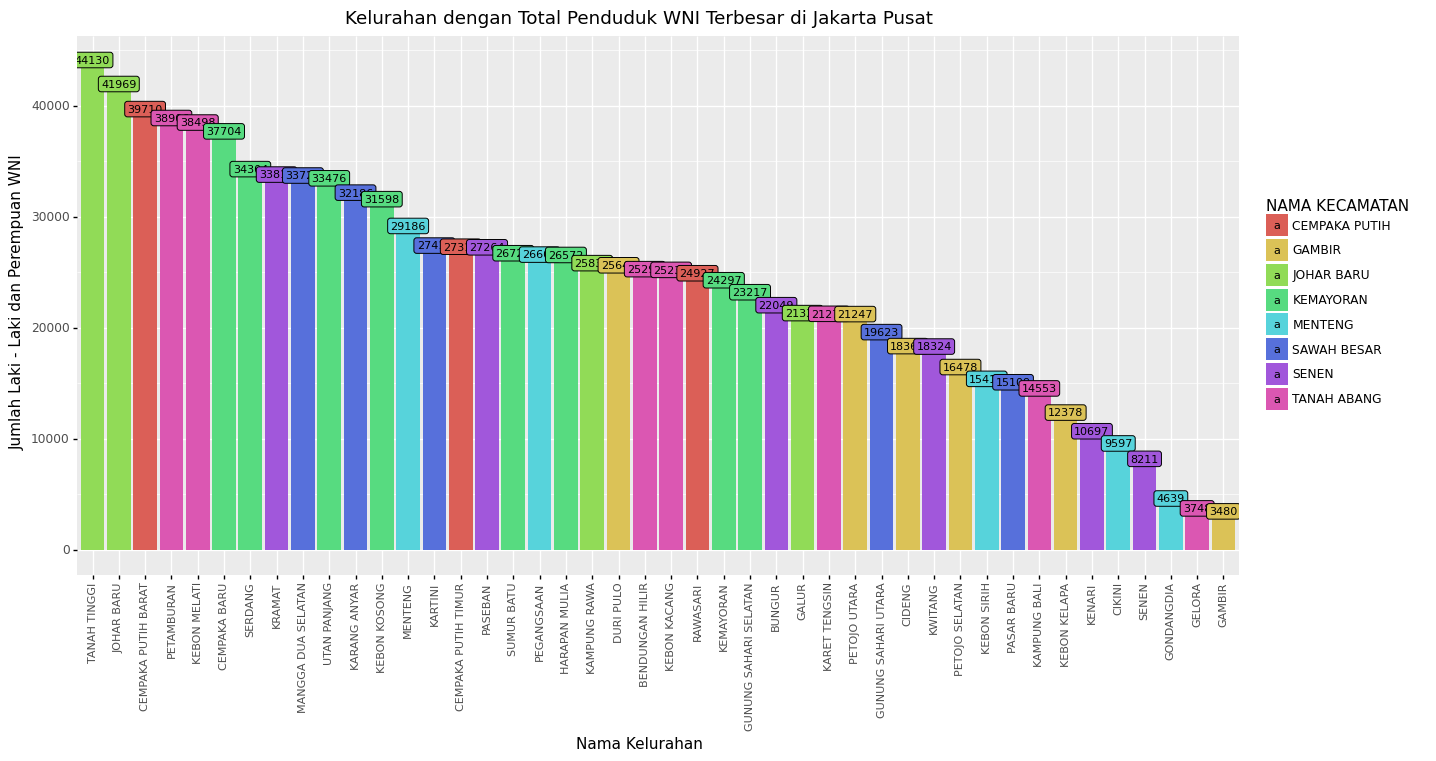

In [19]:
# visualisasikan grafik dengan 10 Kelurahan tertinggi
plotnine.options.figure_size=(15, 7)

(ggplot(data=table_new)
  +aes(x='NAMA KELURAHAN', y='Total', fill='NAMA KECAMATAN',label='Total')
  +geom_col(position='position_dodge')
  +theme(axis_text_x = element_text(angle=90,size=8))
  +geom_label(size=8,position =position_dodge(1),color='black')
  +labs(title = 'Kelurahan dengan Total Penduduk WNI Terbesar di Jakarta Pusat',
         x = 'Nama Kelurahan',
         y = 'Jumlah Laki - Laki dan Perempuan WNI')
).draw()
plt.show()

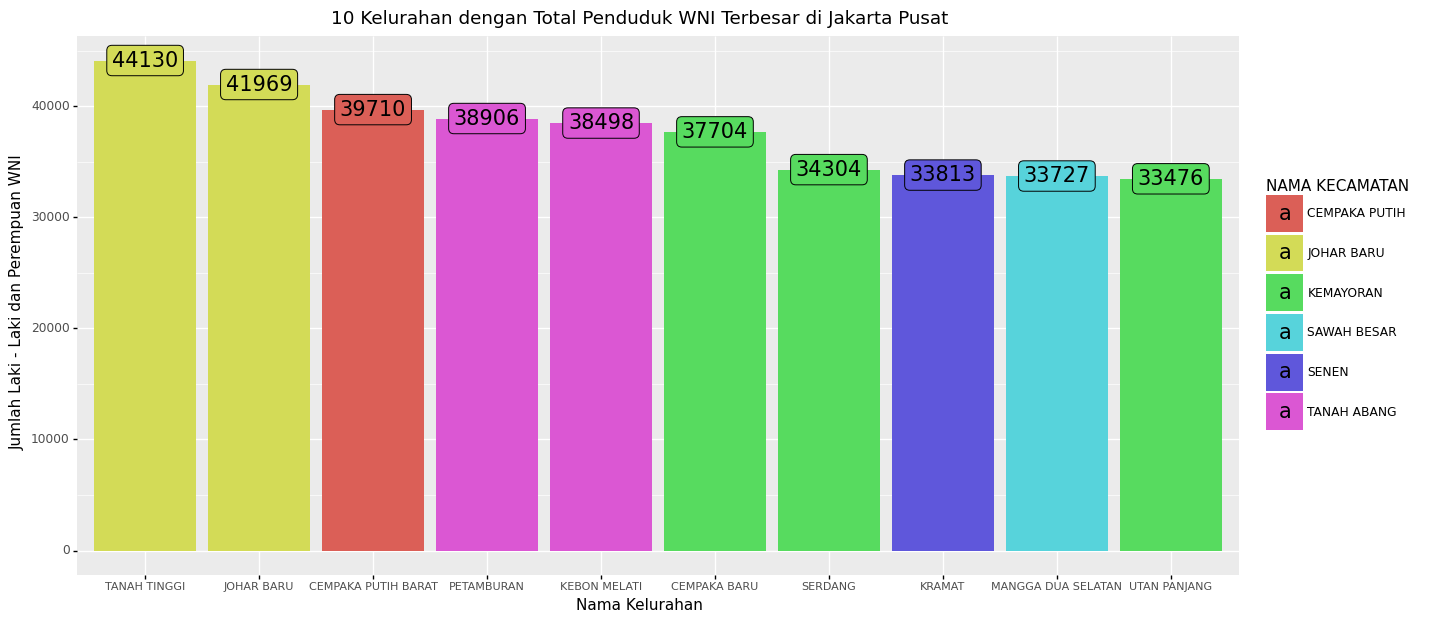

In [20]:
# visualisasikan grafik dengan 10 Kelurahan tertinggi
plotnine.options.figure_size=(15, 7)

(ggplot(data=table_new.head(10))
  +aes(x='NAMA KELURAHAN', y='Total', fill='NAMA KECAMATAN',label='Total')
  +geom_col(position='position_dodge')
  +theme(axis_text_x = element_text(angle=0,size=8))
  +geom_label(size=15,position =position_dodge(1),color='black')
  +labs(title = '10 Kelurahan dengan Total Penduduk WNI Terbesar di Jakarta Pusat',
         x = 'Nama Kelurahan',
         y = 'Jumlah Laki - Laki dan Perempuan WNI')
).draw()
plt.show()

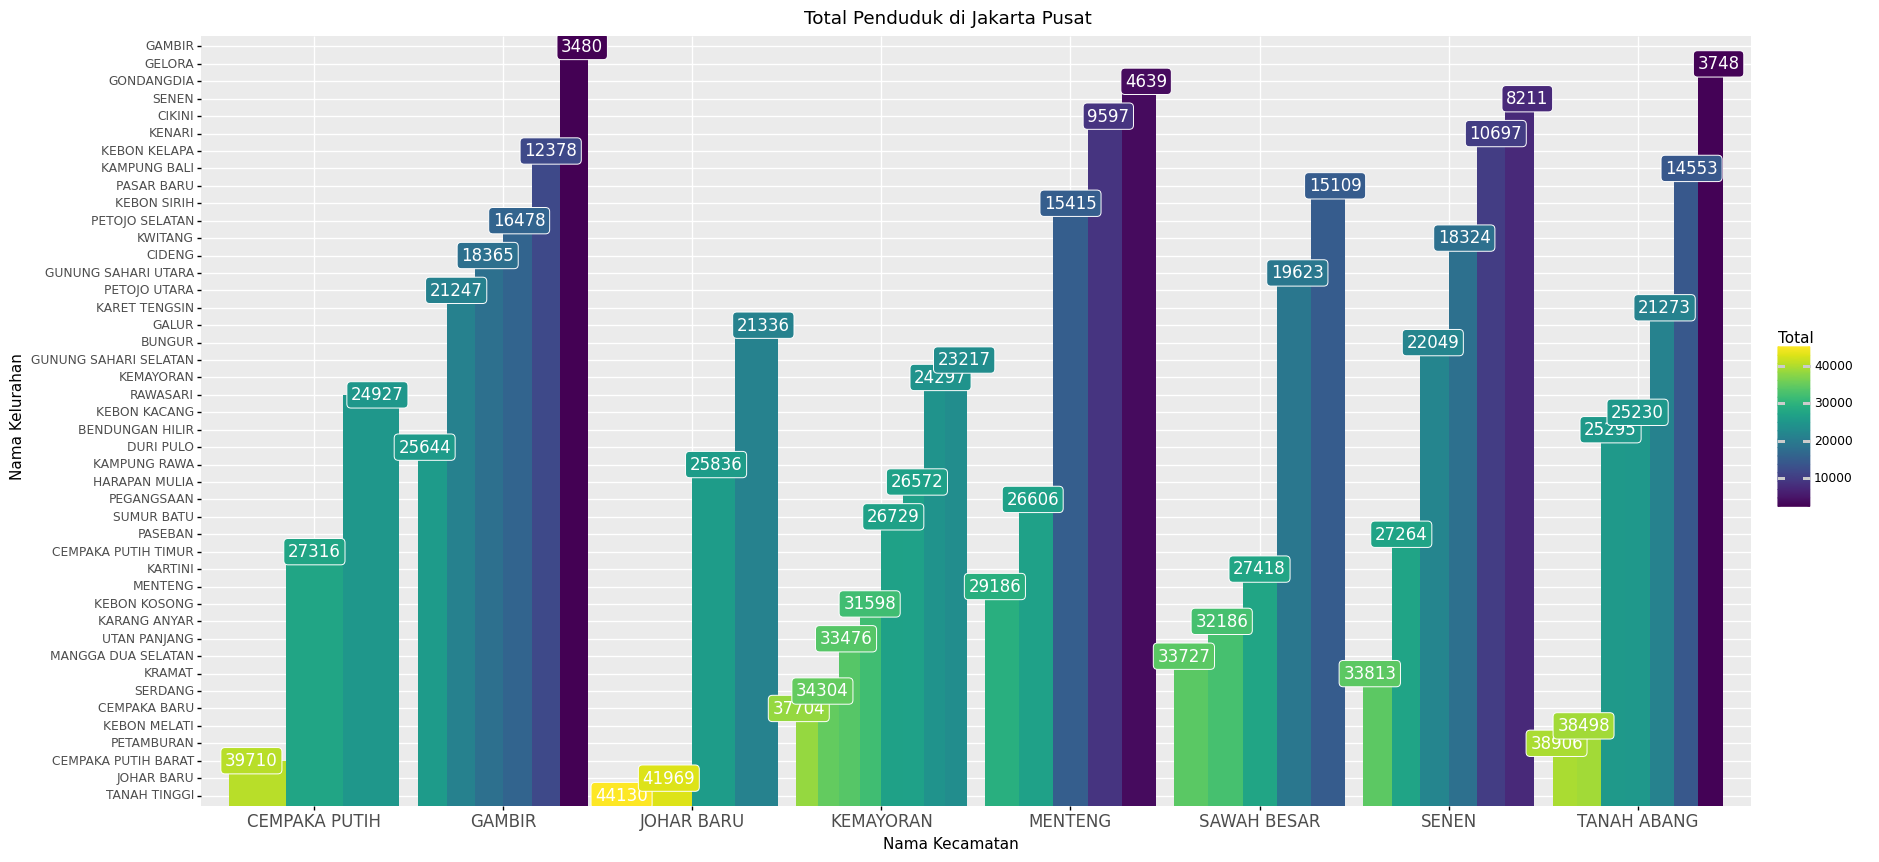

In [21]:
# visualisasikan grafik
plotnine.options.figure_size=(20, 10)

(ggplot(data=table_new)
  +aes(x='NAMA KECAMATAN', y='NAMA KELURAHAN', fill='Total',label='Total')
  +geom_col(position='position_dodge')
  +theme(axis_text_x = element_text(angle=0,size=12))
  +geom_label(size=12,position =position_dodge(1),color='white')
  +labs(title = 'Total Penduduk di Jakarta Pusat ',
         x = 'Nama Kecamatan',
         y = 'Nama Kelurahan')
).draw()
plt.show()

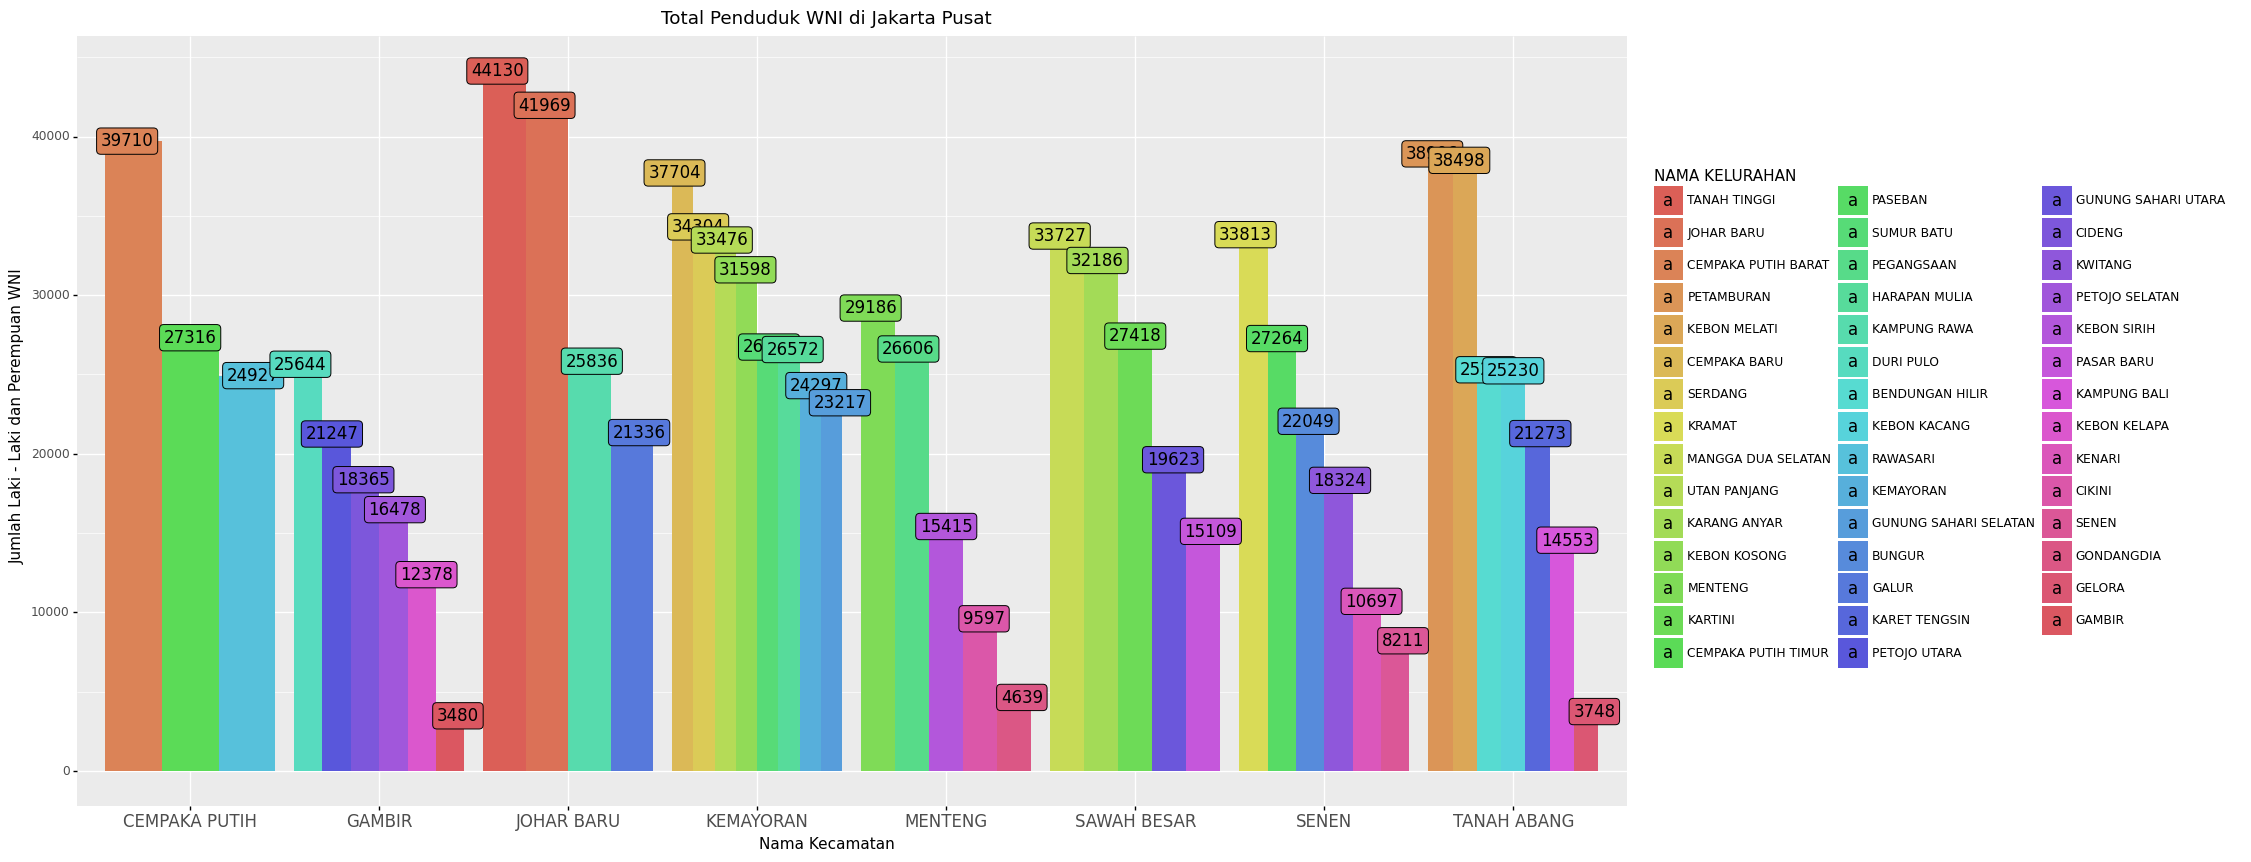

In [22]:
# visualisasikan grafik
plotnine.options.figure_size=(20, 10)

(ggplot(data=table_new)
  +aes(x='NAMA KECAMATAN', y='Total', fill='NAMA KELURAHAN',label='Total')
  +geom_col(position='position_dodge')
  +theme(axis_text_x = element_text(angle=0,size=12))
  +geom_label(size=12,position =position_dodge(1),color='black')
  +labs(title = 'Total Penduduk WNI di Jakarta Pusat',
         x = 'Nama Kecamatan',
         y = 'Jumlah Laki - Laki dan Perempuan WNI')
).draw()
plt.show()

In [23]:
#Meng-import Package
#https://academy.dqlab.id/main/livecode/295/565/2833?pr=0
import plotnine as p9
import pandas as pd

In [24]:
#Membaca Data
#https://academy.dqlab.id/main/livecode/295/565/2834?pr=0
import pandas as pd
df_penduduk = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/datakependudukandki-dqlab.csv')
df_inflasi = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/inflasi.csv')

In [25]:
#Menampilkan Data
#https://academy.dqlab.id/main/livecode/295/566/2835?pr=0
#Pada package plotnine , sebuah grafik terdiri dari komponen-komponen sebagai berikut:
#1. data: sebuah data frame yang berisi data yang ingin kita visualisasikan
#2. geoms (geometric objects): objek geometris seperti lingkaran, titik, dan teks yang ingin kita lihat di grafik
#3. aesthetics: pemetaan dari data ke geometric objects seperti posisi, ukuran, warna, bentuk, dll.

#Di plotnine , ketiga komponen tersebut dihubungkan dengan operator + 
print (df_penduduk.head())

   TAHUN         NAMA PROVINSI NAMA KABUPATEN/KOTA NAMA KECAMATAN  \
0   2013  PROVINSI DKI JAKARTA       JAKARTA BARAT     CENGKARENG   
1   2013  PROVINSI DKI JAKARTA       JAKARTA BARAT     CENGKARENG   
2   2013  PROVINSI DKI JAKARTA       JAKARTA BARAT     CENGKARENG   
3   2013  PROVINSI DKI JAKARTA       JAKARTA BARAT     CENGKARENG   
4   2013  PROVINSI DKI JAKARTA       JAKARTA BARAT     CENGKARENG   

     NAMA KELURAHAN  LUAS WILAYAH (KM2)  KEPADATAN (JIWA/KM2) JENIS KELAMIN  \
0  CENGKARENG BARAT                4.26                 16409     Laki-laki   
1  CENGKARENG BARAT                4.26                 16409     Perempuan   
2  CENGKARENG BARAT                4.26                 16409     Laki-laki   
3  CENGKARENG BARAT                4.26                 16409     Perempuan   
4  CENGKARENG BARAT                4.26                 16409     Laki-laki   

  RENTANG UMUR  JUMLAH  
0        35-39    5316  
1        35-39    3221  
2        40-44    3137  
3        4

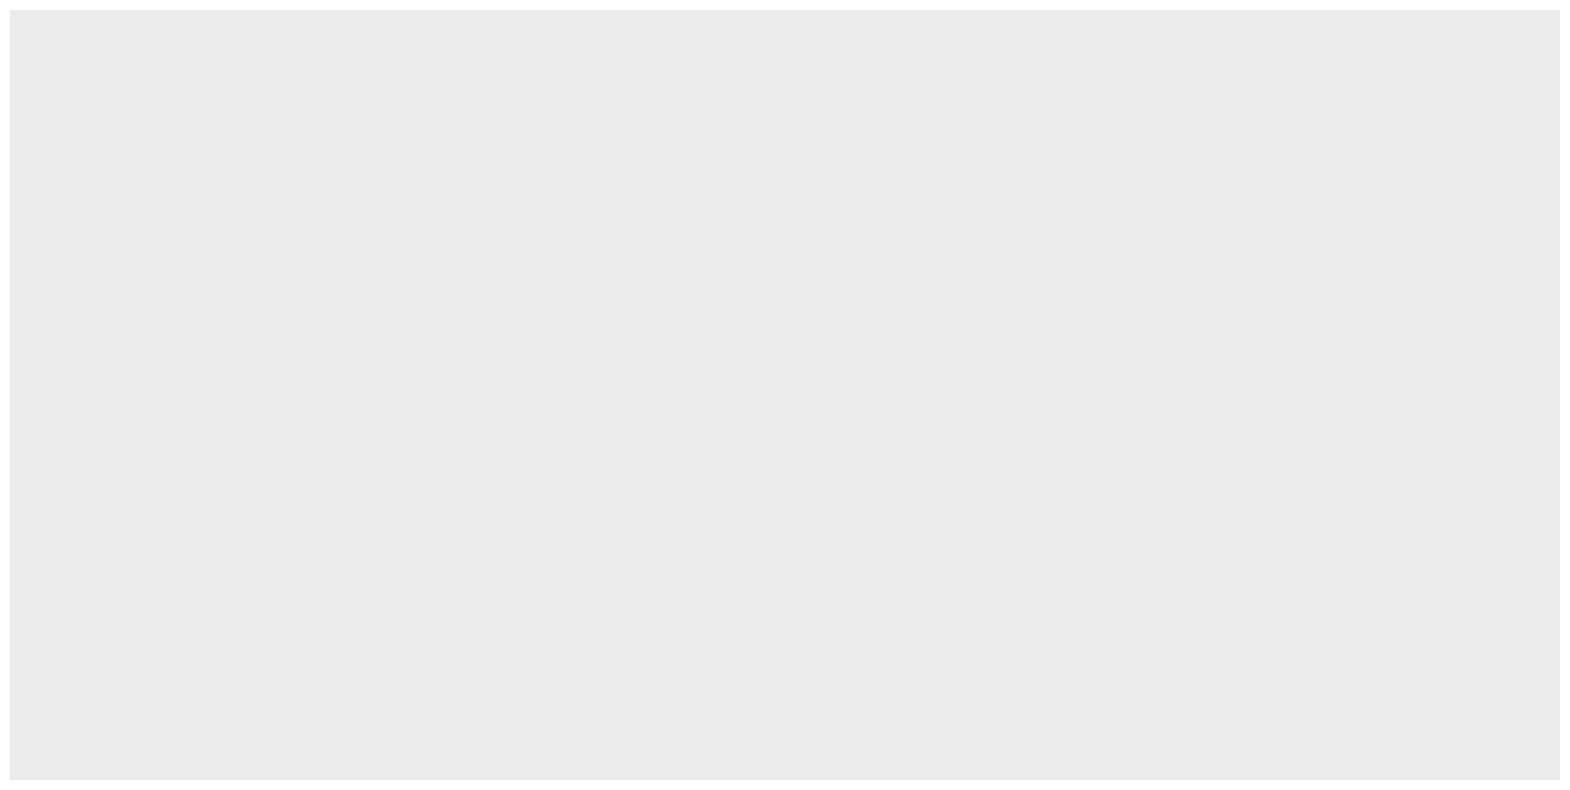

In [26]:
#Menjalankan Fungsi ggplot
# https://academy.dqlab.id/main/livecode/295/566/2836?pr=0
import matplotlib.pyplot as plt
from plotnine import *
ggplot(data=df_penduduk).draw()
plt.show()

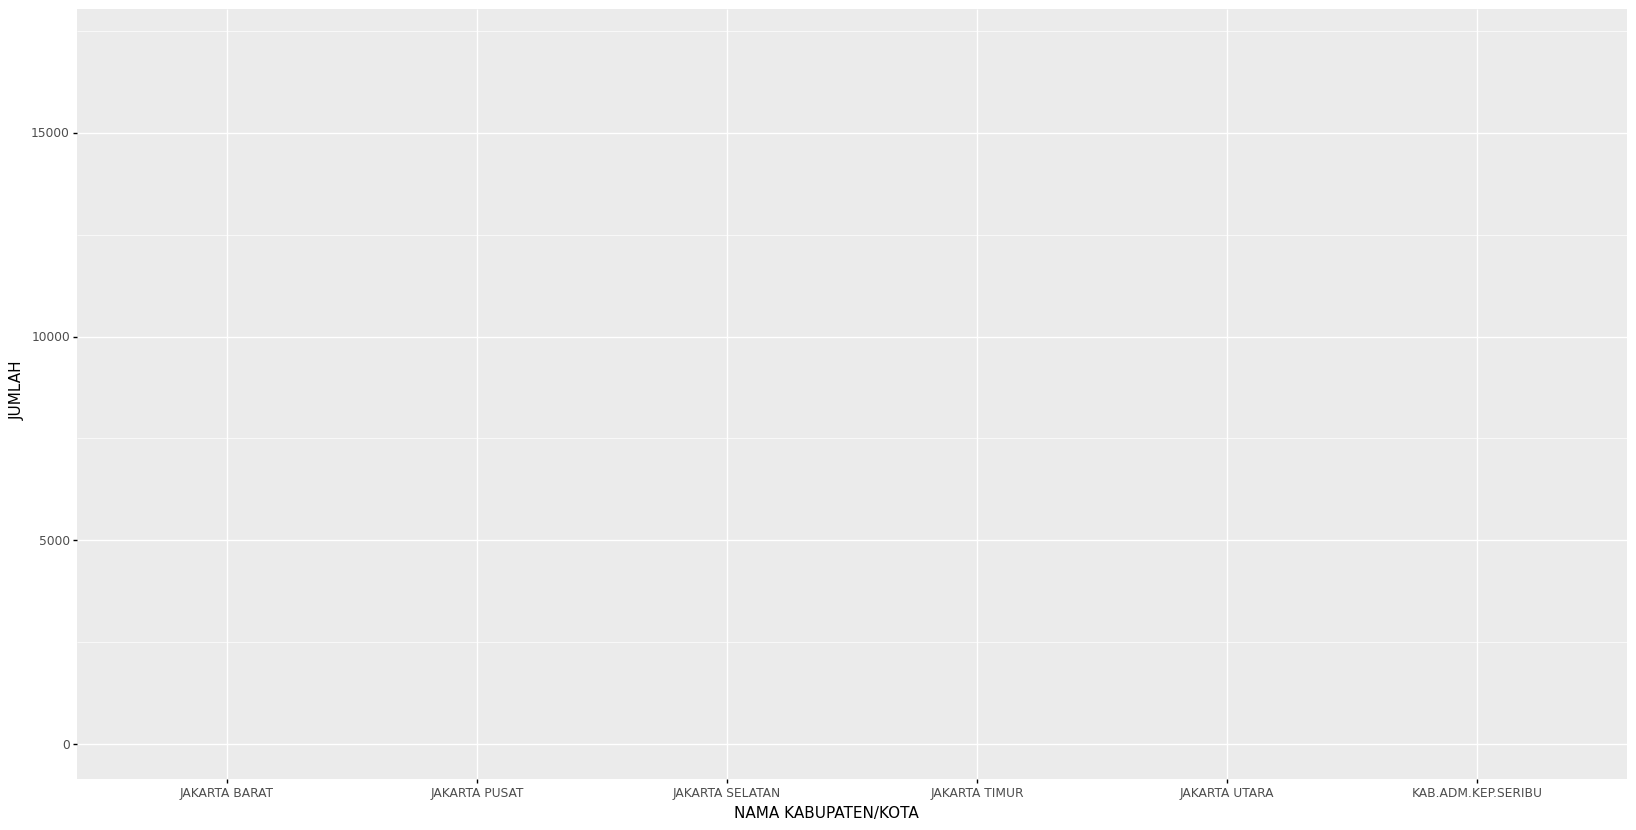

In [27]:
#Menambahkan Variabel
#https://academy.dqlab.id/main/livecode/295/566/2837?pr=0
import matplotlib.pyplot as plt
from plotnine import *
(ggplot(data=df_penduduk)
+ aes(x='NAMA KABUPATEN/KOTA', y='JUMLAH')
).draw()
plt.show()

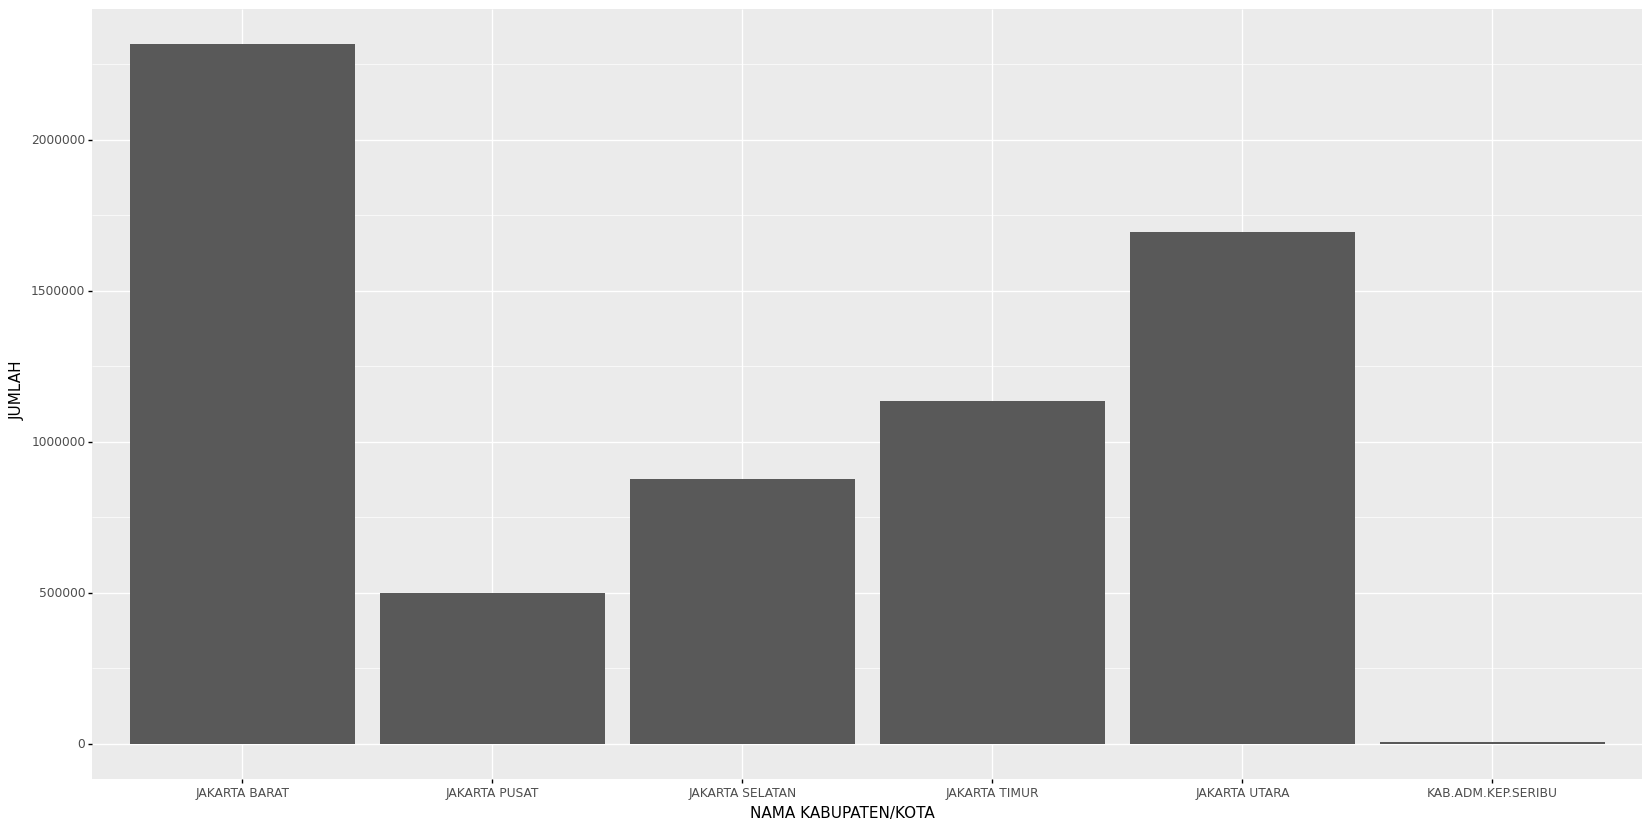

In [28]:
#Mendefinisikan Objek Geometris
#https://academy.dqlab.id/main/livecode/295/566/2838?pr=0
#Ketika menggabungkan dua atau lebih komponen, perlu diperhatikan bahwa:
#1. Kita menggunakan operator +
#2. Kita perlu menggunakan tanda kurung di keseluruhan fungsi kita, karena kalau tidak, Python akan menganggap itu sebagai error.

#Jadi, alih-alih menuliskan:
#ggplot(data=df_penduduk)
#+ aes(x='NAMA KABUPATEN/KOTA', y='JUMLAH')

#Kita harus menuliskan tanda kurung di sekitar fungsinya:
#(ggplot(data=df_penduduk)
#+ aes(x='NAMA KABUPATEN/KOTA', y='JUMLAH'))
import matplotlib.pyplot as plt
from plotnine import *
(ggplot(data=df_penduduk)
+ aes(x='NAMA KABUPATEN/KOTA', y='JUMLAH')
+  geom_col()
).draw()
plt.show()

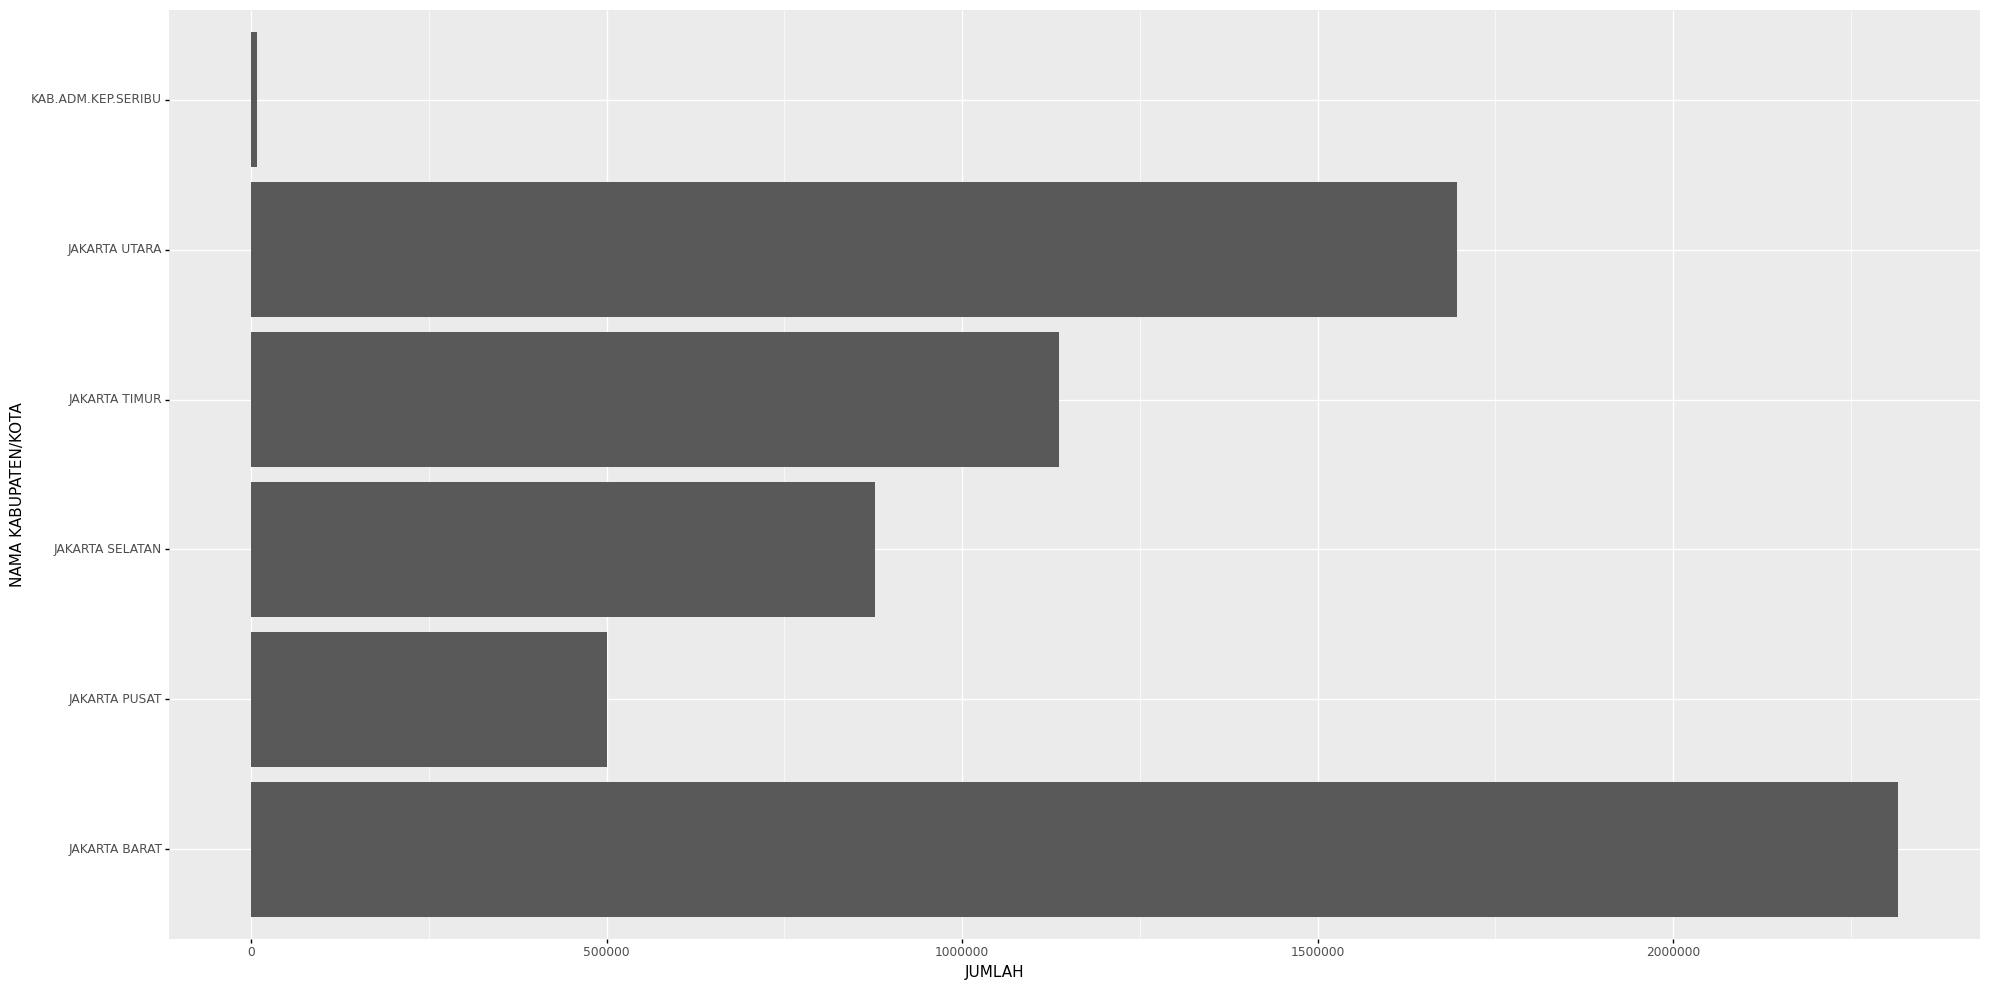

In [29]:
#Membuat Horizontal Bar Chart
#https://academy.dqlab.id/main/livecode/295/566/2839?pr=0
#Di plotnine , kita dapat menggunakan coord_flip() agar x-axis di grafik berubah posisi dari horizontal menjadi vertikal, dan y-axis berubah posisi dari vertikal ke horizontal.
import matplotlib.pyplot as plt
from plotnine import *
(ggplot(data=df_penduduk)
+ aes(x='NAMA KABUPATEN/KOTA', y='JUMLAH')
+ geom_col()
+ coord_flip() 
).draw()
plt.tight_layout()
plt.show()

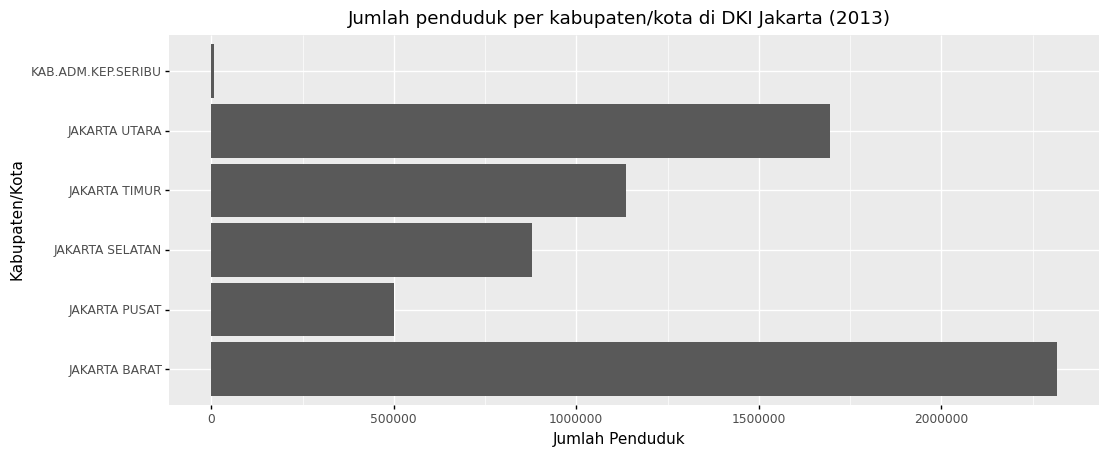

In [30]:
#Menambah Judul dan Mengubah Label
#https://academy.dqlab.id/main/livecode/295/566/2840?pr=0
#title : menambahkan judul plot
#x : mendefinisikan label pada x-axis
#y : mendefinisikan label pada y-axis
#Gunakan fungsi labs untuk:
#Menambahkan judul grafik yaitu "Jumlah penduduk per #kabupaten/kota di DKI Jakarta (2013)"
#Mengubah label "JUMLAH" menjadi "Jumlah Penduduk"
#Mengubah label "NAMA KABUPATEN/KOTA" menjadi "Kabupaten/Kota"
import matplotlib.pyplot as plt
from plotnine import *
import plotnine
plotnine.options.figure_size=(12, 4.8)
(ggplot(data=df_penduduk)
+ aes(x='NAMA KABUPATEN/KOTA', y='JUMLAH')
+ geom_col()
+ coord_flip()
+ labs(title='Jumlah penduduk per kabupaten/kota di DKI Jakarta (2013)',
x='Kabupaten/Kota',
y='Jumlah Penduduk')
).draw()
plt.show()

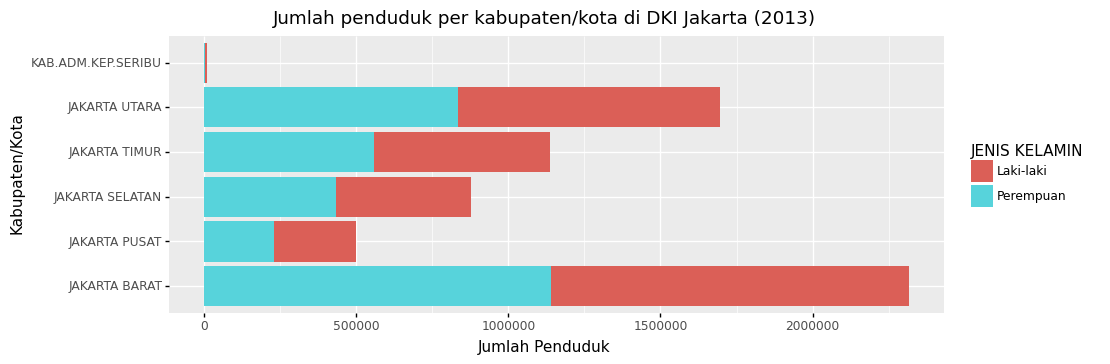

In [31]:
#Menampilkan Warna Berbeda
#https://academy.dqlab.id/main/livecode/295/566/2841?pr=0
import matplotlib.pyplot as plt
from plotnine import *
import plotnine
plotnine.options.figure_size=(10, 3.6)
(ggplot(data=df_penduduk)
+ aes(x='NAMA KABUPATEN/KOTA', y='JUMLAH', fill='JENIS KELAMIN')
+ geom_col()
+ coord_flip()
+ labs(title='Jumlah penduduk per kabupaten/kota di DKI Jakarta (2013)',
x='Kabupaten/Kota',
y='Jumlah Penduduk')
).draw()
plt.show()

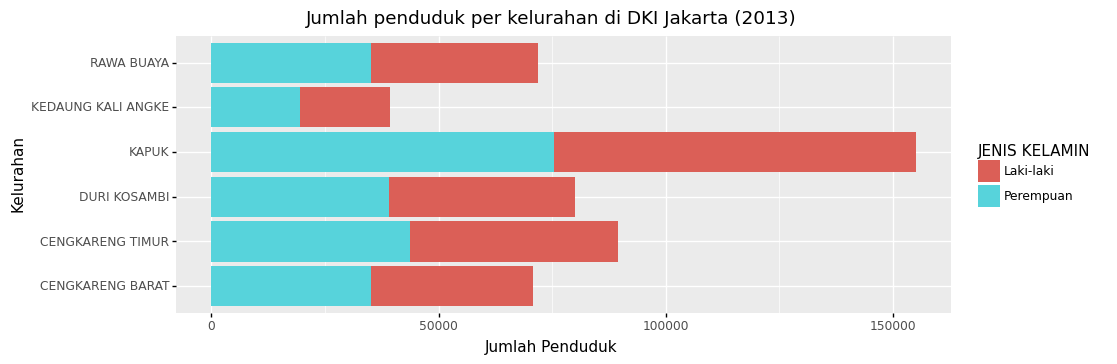

In [32]:
#Membuat Grafik dengan Variabel Berbeda
#https://academy.dqlab.id/main/livecode/295/566/2842?pr=0
import matplotlib.pyplot as plt
from plotnine import *
import plotnine
plotnine.options.figure_size=(10, 3.6)
(ggplot(data=df_penduduk[df_penduduk['NAMA KECAMATAN'] == 'CENGKARENG'])
+ aes(x='NAMA KELURAHAN', y='JUMLAH', fill='JENIS KELAMIN')
+ geom_col()
+ coord_flip()
+ labs(title='Jumlah penduduk per kelurahan di DKI Jakarta (2013)',
x='Kelurahan',
y='Jumlah Penduduk')
).draw()
plt.show()

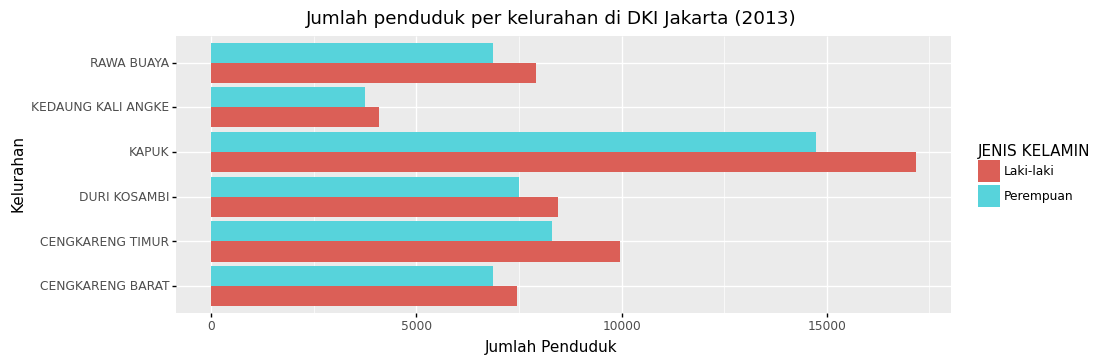

In [33]:
#Memisahkan Grafik
#https://academy.dqlab.id/main/livecode/295/566/2843?pr=0
#Kita dapat menggunakan argumen position di fungsi geom_col() . Untuk memisahkan grafik tersebut kita dapat mendefinisikan position = position_dodge .
import matplotlib.pyplot as plt
from plotnine import *
import plotnine
plotnine.options.figure_size=(10, 3.6)
(ggplot(data=df_penduduk[df_penduduk['NAMA KECAMATAN'] == 'CENGKARENG'])
+ aes(x='NAMA KELURAHAN', y='JUMLAH', fill='JENIS KELAMIN')
+ geom_col(position='position_dodge')
+ coord_flip()
+ labs(title='Jumlah penduduk per kelurahan di DKI Jakarta (2013)',
x='Kelurahan',
y='Jumlah Penduduk')
).draw()
plt.show()

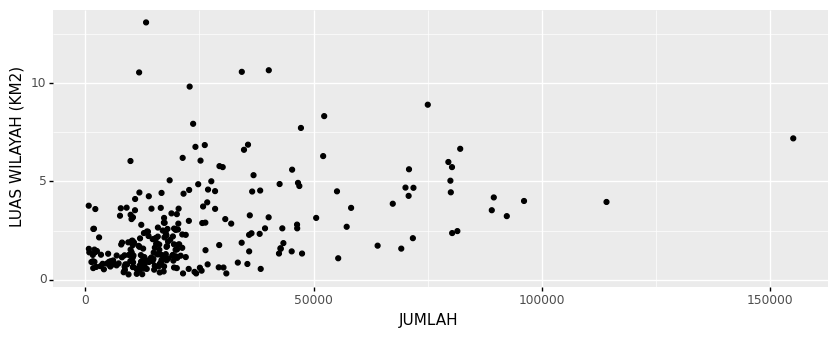

In [34]:
#Membuat Scatterplot
#https://academy.dqlab.id/main/livecode/295/567/2846?pr=0
import matplotlib.pyplot as plt
from plotnine import *

df_penduduk_luas_jumlah = df_penduduk.groupby(['NAMA KELURAHAN', 'LUAS WILAYAH (KM2)'])[['JUMLAH']].agg('sum').reset_index()

(ggplot(data=df_penduduk_luas_jumlah)
+ aes(y='LUAS WILAYAH (KM2)', x='JUMLAH')
+ geom_point()
).draw()
plt.show()

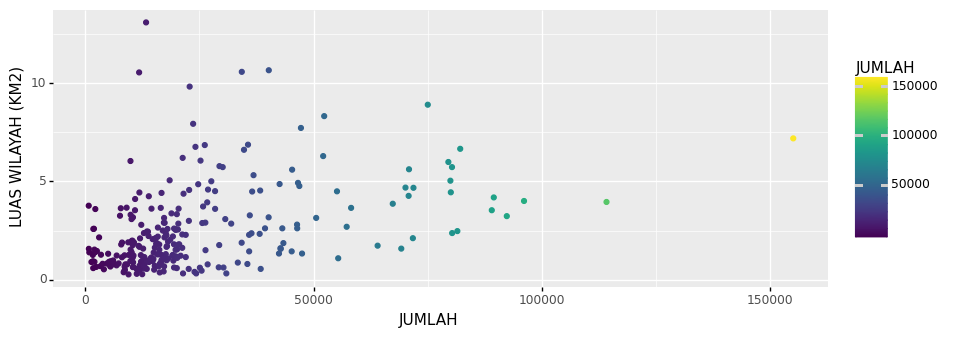

In [35]:
#Memberi Warna pada Scatterplot
#https://academy.dqlab.id/main/livecode/295/567/2847?pr=0
#Pada fungsi aes() , gunakan argumen color agar kita dapat memberikan warna yang merepresentasikan besarnya nilai dari variabel jumlah penduduk.
import matplotlib.pyplot as plt
from plotnine import *
import plotnine
plotnine.options.figure_size=(10, 3.6)
(ggplot(data=df_penduduk_luas_jumlah)
+ aes(y='LUAS WILAYAH (KM2)', x='JUMLAH', color='JUMLAH')
+ geom_point()
).draw()
plt.show()

C:\Users\fikoa\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 46'. Pick better value with 'binwidth'.


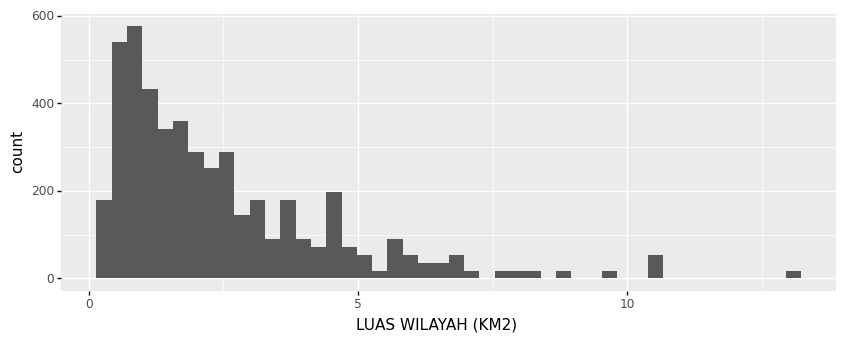

In [45]:
#Membuat Histogram
#https://academy.dqlab.id/main/livecode/295/567/2848?pr=0
#Histogram berguna untuk menggambarkan distribusi data atau merangkum data. Di sini, kita akan menggunakan histogram untuk melihat distribusi luas wilayah di data kita. Untuk membuat histogram di plotnine , kita dapat menggunakan geom_histogram() .
import matplotlib.pyplot as plt
from plotnine import *
(ggplot(data=df_penduduk)
+ aes(x='LUAS WILAYAH (KM2)')
+geom_histogram()
).draw()
plt.show()

C:\Users\fikoa\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 46'. Pick better value with 'binwidth'.


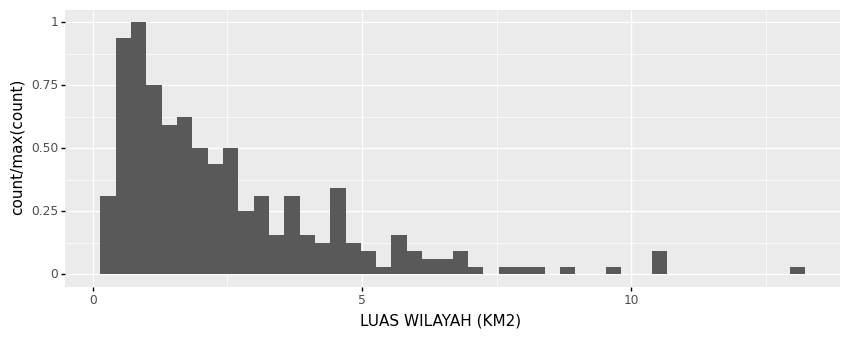

In [39]:
#Membuat Histogram 2
#https://academy.dqlab.id/main/livecode/295/567/2849?pr=0
#Terkadang, dalam pembuatan histogram, kita ingin tinggi bar di plot kita memiliki nilai maksimal 1. Oleh karena itu kita perlu melakukan kalkulasi. Kita dapat melakukan kalkulasi tersebut langsung di aestetik dengan menggunakan bantuan stat (statistical transformation atau transformasi statistik).

#Secara default, ketika kita menggunakan histogram sebenarnya plotnine telah mendefinisikan y = 'stat(count)' yang berarti y akan merepresentasikan count dari luas wilayah tersebut. Karena sekarang kita ingin supaya tinggi bar kita memiliki nilai maksimal 1, kita perlu mendefinisikan y secara eksplisit dengan definisi kita sendiri.
import matplotlib.pyplot as plt
from plotnine import *
(ggplot(data=df_penduduk)
+ aes(x='LUAS WILAYAH (KM2)', y='stat(count/max(count))')
+ geom_histogram()
).draw()
plt.show()

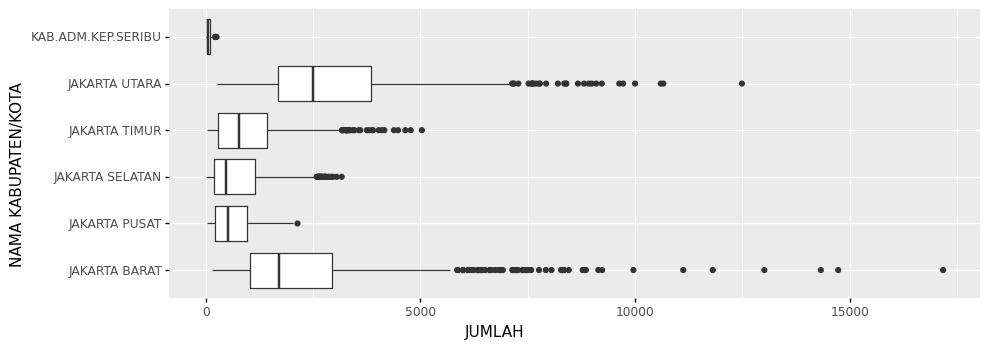

In [40]:
#Membuat Boxplot
#https://academy.dqlab.id/main/livecode/295/567/2850?pr=0
#Boxplot biasanya digunakan untuk melihat seberapa spread out dataset yang kita miliki. plotnine telah menyediakan geom bernama geom_boxplot() .
import matplotlib.pyplot as plt
from plotnine import *
(ggplot(data=df_penduduk)
+ aes(x='NAMA KABUPATEN/KOTA', y='JUMLAH')
+ geom_boxplot()
+ coord_flip()
).draw()
plt.tight_layout()
plt.show()

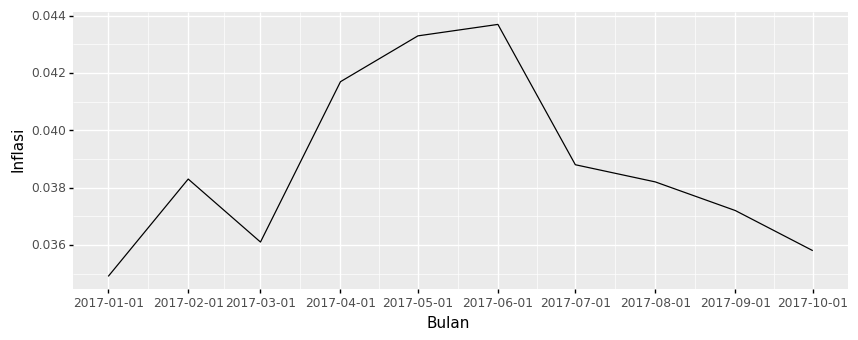

In [41]:
#Membuat Line Chart
# https://academy.dqlab.id/main/livecode/295/567/2851?pr=0
#Line chart biasanya digunakan untuk memvisualisasikan pergerakan data seiring berjalannya waktu. Dalam pembuatan line chart kali ini, kita akan menggunakan data inflasi. geom yang dapat kita gunakan adalah geom_line() . Dengan line chart yang kita buat, kita akan mengetahui pergerakan inflasi (dalam persen) di negara Indonesia dan Singapura dari bulan ke bulan, mulai dari Januari sampai Oktober 2017.

#Namun sebelum itu kita perlu mengubah tipe data kolom Bulan di df_inflasi dari string menjadi datetime. Hal ini agar plotnine dapat mengetahui bahwa Bulan adalah kolom yang menggambarkan waktu. Sehingga, plotnine akan secara otomatis mengurutkan inflasi di data kita berdasarkan urutan bulan.

#Sebagai awal, kita akan membuat line chart untuk negara Indonesia terlebih dahulu. Buatlah line chart yang menunjukkan pergerakan inflasi (dalam persen) dari bulan ke bulan untuk negara Indonesia dengan menggunakan geom_line() .

#Gunakan aes() untuk mendefinisikan variabel di x-axis dan y-axis. Di x-axis variabelnya adalah Bulan, serta di y-axis variabelnya adalah Inflasi.
import matplotlib.pyplot as plt
from plotnine import *
df_inflasi['Bulan'] = pd.to_datetime(df_inflasi['Bulan'])
(ggplot(data=df_inflasi[df_inflasi['Negara']=='Indonesia'])
+ aes(x='Bulan', y='Inflasi')
+ geom_line()
).draw()
plt.show()

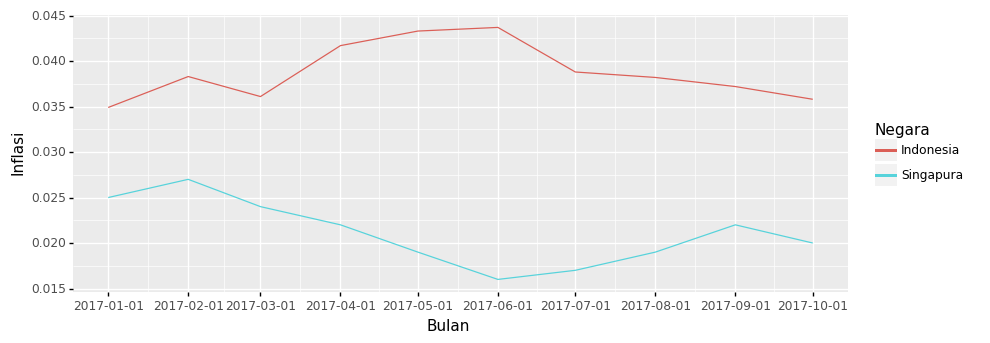

In [42]:
#Membuat 2 Line Chart
#https://academy.dqlab.id/main/livecode/295/567/2852?pr=0
import matplotlib.pyplot as plt
from plotnine import *
import plotnine
plotnine.options.figure_size=(10, 3.6)
(ggplot(data=df_inflasi)
+ aes(x='Bulan', y='Inflasi', color='Negara')
+ geom_line()
).draw()
plt.show()

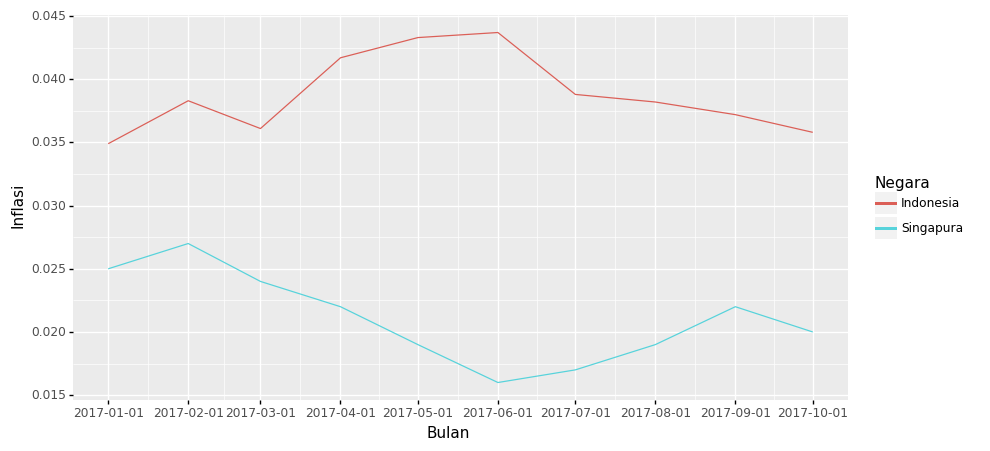

In [43]:
#Mengubah Ukuran Plot
#https://academy.dqlab.id/main/livecode/295/567/2853?pr=0
import matplotlib.pyplot as plt
from plotnine import *
(ggplot(data=df_inflasi)
+ aes(x='Bulan', y='Inflasi', color='Negara')
+ geom_line()
+ theme(figure_size=(10, 5))
).draw()
plt.show()